# wyniki testów

In [1]:
from some_functions import *
from popularity_model import *
import pandas as pd
import numpy as np 
from matplotlib import pyplot as plt

In [2]:
results = get_db(r'C:\Users\a814811\OneDrive - Atos\RecommenderSystem\Piotr\model\test_model\test_results')

In [3]:
results.head()

,model,user,number_of_recomm,user_articles,precision,recall,model_ev
0,popularity,0,1,0,NaN,NaN,1.0
1,popularity,0,2,0,NaN,NaN,1.0
2,popularity,0,3,0,NaN,NaN,1.0
3,popularity,0,4,0,NaN,NaN,1.0
4,popularity,0,5,0,NaN,NaN,1.0


In [3]:
results[results['user_articles']<1][['model','user','user_articles']].info()
# user id: 0 dla for each model

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80 entries, 0 to 53036
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   model          80 non-null     object
 1   user           80 non-null     int64 
 2   user_articles  80 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 2.5+ KB


### precision and recalls for models, from every possible number of recommendations

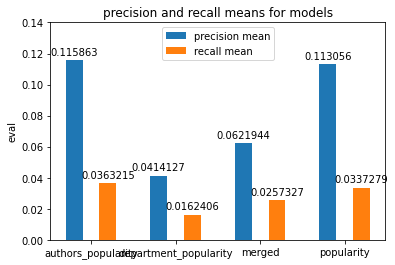

In [5]:
pre = results.groupby(['model'])['precision'].mean()
rec = results.groupby(['model'])['recall'].mean()


wd = 0.2
x = np.arange(4)

fig, ax = plt.subplots()
a1 = ax.bar(x-wd, pre.values, wd, label='precision mean')
a2 = ax.bar(x+wd, rec.values, wd, label='recall mean')
ax.set_ylabel('eval')
ax.set_xticks(x)
ax.set_xticklabels(pre.index)
# limit dla osi y
plt.gca().set_ylim([0,0.14])

ax.bar_label(a1,padding=3)
ax.bar_label(a2,padding=3)
ax.legend(loc='upper center')
plt.title('precision and recall means for models')
plt.show()

#### % of users without recommendation for model

In [6]:
# a = results.groupby(['model','user']).agg({'number_of_recomm': 'max'})
# # a.count() # 1001
# a = a[a['number_of_recomm']==0] 
# a.groupby(['model']).agg({'number_of_recomm': 'count'})
# # odejmuje 1, bo to uzytkownik testowy bez niczego (powinno być NaN w tabeli)

# alternatywnie
a = results.groupby(['model','user']).agg({'precision': 'max'})
a[a['precision'].isna()].reset_index().groupby(['model']).count()['user']

model
authors_popularity       349
department_popularity      7
merged                     1
popularity                 1
Name: user, dtype: int64

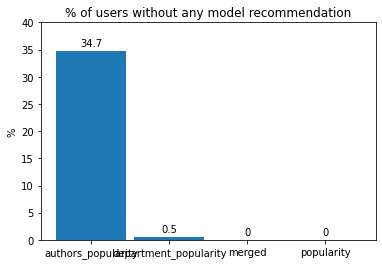

In [8]:
x = np.arange(4)
wd=0.9
fig, ax = plt.subplots()
a1 = ax.bar(x, [34.7,0.5,0,0], wd)
ax.set_xticks(x)
ax.set_xticklabels(pre.index)
ax.set_ylabel('%')
ax.bar_label(a1,padding=3)
plt.gca().set_ylim([0,40])
plt.title('% of users without any model recommendation')
plt.show()

In [12]:
m5 = results[results['number_of_recomm']==5]
m10 = results[results['number_of_recomm']==10]
m15 = results[results['number_of_recomm']==15]

m5.groupby(['model'])[['precision','recall']].describe().reset_index()

model precision                                          \
                             count      mean       std  min  25%  50%  75%   
0     authors_popularity     649.0  0.135285  0.168517  0.0  0.0  0.0  0.2   
1  department_popularity     993.0  0.041893  0.092986  0.0  0.0  0.0  0.0   
2             popularity    1000.0  0.146000  0.169684  0.0  0.0  0.2  0.2   

        recall                                                              
   max   count      mean       std  min  25%       50%       75%       max  
0  0.8   649.0  0.022668  0.032056  0.0  0.0  0.000000  0.040000  0.250000  
1  0.4   993.0  0.007999  0.021767  0.0  0.0  0.000000  0.000000  0.166667  
2  0.8  1000.0  0.026706  0.037054  0.0  0.0  0.020833  0.042553  0.333333

In [13]:
m10.groupby(['model'])[['precision','recall']].describe().reset_index()

model precision                                          \
                             count      mean       std  min  25%  50%  75%   
0     authors_popularity     641.0  0.113885  0.113099  0.0  0.0  0.1  0.2   
1  department_popularity     993.0  0.039577  0.067760  0.0  0.0  0.0  0.1   
2             popularity    1000.0  0.095900  0.100714  0.0  0.0  0.1  0.2   

        recall                                                              
   max   count      mean       std  min  25%       50%       75%       max  
0  0.7   641.0  0.037972  0.041442  0.0  0.0  0.028571  0.060606  0.375000  
1  0.4   993.0  0.014757  0.028835  0.0  0.0  0.000000  0.024390  0.166667  
2  0.5  1000.0  0.035005  0.042879  0.0  0.0  0.026316  0.051282  0.400000

In [14]:
m15.groupby(['model'])[['precision','recall']].describe().reset_index()

model precision                                     \
                             count      mean       std  min       25%   
0     authors_popularity     628.0  0.100106  0.086231  0.0  0.066667   
1  department_popularity     993.0  0.041490  0.057322  0.0  0.000000   
2             popularity    1000.0  0.077400  0.077300  0.0  0.000000   

                                 recall                                 \
        50%       75%       max   count      mean       std  min   25%   
0  0.066667  0.133333  0.466667   628.0  0.050250  0.048783  0.0  0.02   
1  0.000000  0.066667  0.333333   993.0  0.023727  0.036935  0.0  0.00   
2  0.066667  0.133333  0.400000  1000.0  0.041712  0.046321  0.0  0.00   

                                 
        50%       75%       max  
0  0.043478  0.071429  0.375000  
1  0.000000  0.040000  0.222222  
2  0.035714  0.062500  0.400000

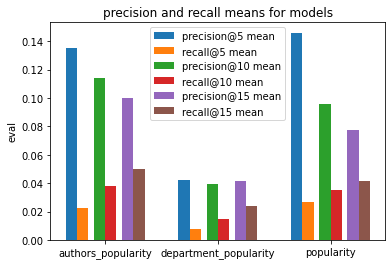

In [15]:
def mn(db,name):
    return db.groupby(['model'])[name].mean()

wd = 0.1
x = np.arange(3)

fig, ax = plt.subplots()
a1 = ax.bar(x-3*wd, mn(m5,'precision').values, wd, label='precision@5 mean')
a2 = ax.bar(x-2*wd, mn(m5,'recall').values, wd, label='recall@5 mean')
a3 = ax.bar(x-wd/2, mn(m10,'precision').values, wd, label='precision@10 mean')
b1 = ax.bar(x+1*wd/2, mn(m10,'recall').values, wd, label='recall@10 mean')
b2 = ax.bar(x+2*wd, mn(m15,'precision').values, wd, label='precision@15 mean')
b3 = ax.bar(x+3*wd, mn(m15,'recall').values, wd, label='recall@15 mean')

ax.set_ylabel('eval')
ax.set_xticks(x)
ax.set_xticklabels(mn(m5,'precision').index)

ax.legend(loc='upper center')
plt.title('precision and recall means for models')
plt.show()